# Self-Organizing Maps

## Importing the libraries

In [8]:
! pip install minisom

In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

## Training the SOM

In [11]:
from minisom import MiniSom
som = MiniSom(x = 10 , y = 10, input_len = 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

## Visualizing the results

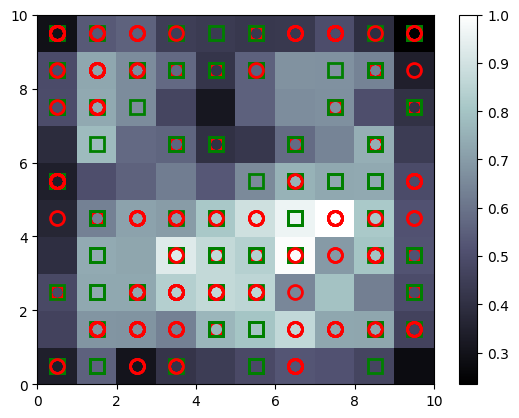

In [13]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)

## Finding the frauds

In [18]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,5)], mappings[(7,4)], mappings[(4,4)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [19]:
pd.DataFrame(frauds)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15597536.0,1.0,27.67,2.000,2.0,14.0,8.0,1.000,1.0,1.0,4.0,0.0,2.0,140.0,7545.0
1,15571284.0,1.0,32.83,2.500,2.0,13.0,8.0,2.750,1.0,1.0,6.0,0.0,2.0,160.0,2073.0
2,15570947.0,1.0,27.25,1.665,2.0,13.0,8.0,5.085,1.0,1.0,9.0,0.0,2.0,399.0,828.0
3,15641715.0,1.0,19.42,6.500,2.0,9.0,8.0,1.460,1.0,1.0,7.0,0.0,2.0,80.0,2955.0
4,15598586.0,1.0,26.67,2.710,1.0,13.0,4.0,5.250,1.0,1.0,1.0,0.0,2.0,211.0,1.0
5,15745375.0,0.0,33.08,1.625,2.0,2.0,4.0,0.540,0.0,0.0,0.0,1.0,2.0,0.0,1.0
6,15734578.0,0.0,21.75,11.750,2.0,8.0,4.0,0.250,0.0,0.0,0.0,1.0,2.0,180.0,1.0
7,15570508.0,0.0,51.92,6.500,2.0,3.0,5.0,3.085,0.0,0.0,0.0,1.0,2.0,73.0,1.0
8,15641733.0,0.0,50.25,0.835,2.0,6.0,4.0,0.500,0.0,0.0,0.0,1.0,2.0,240.0,118.0
9,15660144.0,0.0,26.17,2.000,2.0,5.0,3.0,0.000,0.0,0.0,0.0,1.0,2.0,276.0,2.0
